## Линейная регрессия и стохастический градиентный спуск

In [1]:
#загрузим данные из файла
import pandas as pd
import numpy as np
data = pd.read_csv('advertising.csv')

In [2]:
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
X = data[['TV','Radio','Newspaper']].to_numpy()
Y = data[['Sales']].to_numpy()

In [5]:
#масштабируем данные
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X-mean)/std
#добавим столбец из единиц, чтобы не обрабатывать коэфф w0
X = np.hstack((X,np.ones((200,1))))
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.00000000e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01  1.00000000e+00]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00  1.00000000e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  1.00000000e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00  1.00000000e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00  1.00000000e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01  1.00000000e+00]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01  1.00000000e+00]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00  1.00000000e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01  1.00000000e+00]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01  1.00000000e+00]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00  1.00000000e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00  1.00000000e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00  1.00000000e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01  1.00000000e

In [14]:
def mserror(y,y_pred):
    return np.sum((y-y_pred)**2)/y.shape[0]
#print(stochastic_gradient_step(X,Y,np.zeros(4).shape(-1.1)))
print(mserror(Y,linear_prediction(X,stochastic_gradient_step(X,Y,np.zeros(4),46,0.01))))

223.7350609752111


In [8]:
#Среднеквадратичная ошибка при прогнозе равном медиане Sales
print(mserror(Y,[np.median(Y, axis = 0)]*Y.shape[0]))

28.34575


In [9]:
#ф-я *normal_equation* которая по заданным матрицам  X и Y
#вычисляет вектор весов согласно нормальному уравнению линейной регрессии
def normal_equation(X,Y):
    Xt = np.transpose(X)
    return np.linalg.solve(np.matmul(Xt,X),np.matmul(Xt,Y))
normeq_weights = normal_equation(X,Y)
print(normeq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


In [10]:
def linear_prediction(X,w):
    return np.matmul(X,w)
#ср.кв. ошибка с весами из ф-ии normal_equation
print(linear_prediction(X,np.array([99,12,7,1]).reshape(-1,1)))

[[ 121.24626231]
 [ -99.85950147]
 [-118.27294353]
 [  29.77201317]
 [  38.89728687]
 [-123.83151856]
 [ -97.05820783]
 [ -39.10650713]
 [-185.71283052]
 [  42.23049117]
 [-108.76859183]
 [  71.25287333]
 [-120.48988224]
 [ -76.48912684]
 [  79.74402734]
 [  83.90225351]
 [ -52.91106743]
 [ 177.69034568]
 [ -95.17491594]
 [  -1.87772613]
 [  94.44596083]
 [  88.46331959]
 [-153.55325588]
 [  88.37495791]
 [-109.55262459]
 [ 115.35625411]
 [  -4.68309485]
 [ 100.79049496]
 [ 119.27473001]
 [ -89.95276232]
 [ 177.76827017]
 [ -40.62799585]
 [ -74.43197727]
 [ 125.6604727 ]
 [ -83.52925479]
 [ 144.4350768 ]
 [ 147.96246233]
 [ -56.57078351]
 [-114.90970598]
 [ 106.75092692]
 [  64.66540625]
 [  46.46904795]
 [ 164.75128859]
 [  56.81336629]
 [-133.88595859]
 [  33.12054217]
 [ -74.4590147 ]
 [ 119.23652446]
 [  93.84871281]
 [ -99.0031091 ]
 [  46.95341665]
 [ -72.67613152]
 [  99.03122399]
 [  69.75878168]
 [ 134.46520313]
 [  91.61355338]
 [-153.130497  ]
 [ -19.32333253]
 [  98.3465734

### Напишем функцию stochastic_gradient_descent, реализующую стохастический градиентный спуск для линейной регрессии

In [70]:
def stochastic_gradient_step(X,Y,w,train_ind,step=1e-2):
    new_w = np.zeros(4).reshape(-1,1)
    for j in range (4):
        new_w[j] =  (2*step/X.shape[0])*X[train_ind][j]*(np.sum(w*(X[train_ind]).reshape(-1,1))-Y[train_ind])
    return new_w

In [72]:
def stochastic_gradient_descent(X,Y,w_init,eta =1e-2,max_iter = 10000,
                                eps = 1e-8,seed = 42, verbose = False):
    msearray = []
    iterations = 0
    np.random.seed(seed)
    new_w = w_init
    k=10
    while (k>= eps and iterations < max_iter):
        index = np.random.randint(X.shape[0])
        w_init = new_w
        new_w = w_init - stochastic_gradient_step(X,Y,new_w,index,eta)
        msearray.append(mserror(Y,linear_prediction(X,new_w)))
        iterations+=1
        k = np.linalg.norm(new_w-w_init)
    return msearray, new_w
a,b = stochastic_gradient_descent(X,Y,np.zeros(4).reshape(-1,1), max_iter = 100000)

In [74]:
print("Среднеквадратичная ошибка:", a[-1])
print("Оптимальные весы: ", b)

Среднеквадратичная ошибка: 2.7844125884067035
Оптимальные весы:  [[ 3.91069256e+00]
 [ 2.78209808e+00]
 [-8.10462217e-03]
 [ 1.40190566e+01]]


#### Теперь посмотрим на зависимость ошибки от номера итерации для  105  итераций стохастического градиентного спуска. Видим, что алгоритм сходится.

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE error')

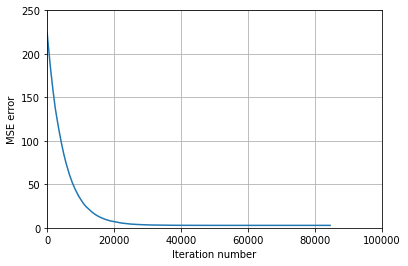

In [78]:
%pylab inline
plot(range(len(a)), a)
axis([0, 1e5, 0, 250])
grid(True)
xlabel('Iteration number')
ylabel('MSE error')